In [59]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [60]:
from IPython.display import display_html
def showReports(dfs,titles):
    htmls = []
    for df, title in zip(dfs, titles):
        html = f"<h4>{title}</h4>" + df.to_html()
        htmls.append(html)

    display_html(''.join(
        f'<div style="display:inline-block; vertical-align:top;text-align:center; padding:6px;">{html}</div>'
        for html in htmls
    ), raw=True)

In [61]:
df = pd.read_csv("digital_literacy_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       1000 non-null   object 
 1   Age                                           1000 non-null   int64  
 2   Gender                                        1000 non-null   object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             1000 non-null   object 
 5   Household_Income                              1000 non-null   object 
 6   Location_Type                                 1000 non-null   object 
 7   Basic_Computer_Knowledge_Score                1000 non-null   int64  
 8   Internet_Usage_Score                          1000 non-null   int64  
 9   Mobile_Literacy_Score                         1000 non-null   in

In [62]:
df.drop_duplicates(keep='first',inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 998
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       788 non-null    object 
 1   Age                                           788 non-null    int64  
 2   Gender                                        788 non-null    object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             788 non-null    object 
 5   Household_Income                              788 non-null    object 
 6   Location_Type                                 788 non-null    object 
 7   Basic_Computer_Knowledge_Score                788 non-null    int64  
 8   Internet_Usage_Score                          788 non-null    int64  
 9   Mobile_Literacy_Score                         788 non-null    int64  


In [63]:
df.drop(columns=['User_ID','Overall_Literacy_Score'], inplace=True)

In [64]:
label_mappings = {}  # to store mappings for each column

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    # store mapping for this column
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Encoded {col} with {len(le.classes_)} unique values.")

# Show mappings
#print(label_mappings)
for col, mapping in label_mappings.items():
    print(f"\nColumn: {col}")
    for original, encoded in mapping.items():
        print(f"  {original} → {encoded}")

Encoded Gender with 3 unique values.
Encoded Education_Level with 3 unique values.
Encoded Employment_Status with 5 unique values.
Encoded Household_Income with 3 unique values.
Encoded Location_Type with 2 unique values.
Encoded Engagement_Level with 3 unique values.
Encoded Employment_Impact with 2 unique values.

Column: Gender
  Female → 0
  Male → 1
  Other → 2

Column: Education_Level
  High School → 0
  Primary → 1
  Secondary → 2

Column: Employment_Status
  Farmer → 0
  Other → 1
  Self-Employed → 2
  Student → 3
  Unemployed → 4

Column: Household_Income
  High → 0
  Low → 1
  Medium → 2

Column: Location_Type
  Rural → 0
  Semi-Rural → 1

Column: Engagement_Level
  High → 0
  Low → 1
  Medium → 2

Column: Employment_Impact
  No → 0
  Yes → 1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           788 non-null    int64  
 1   Gender                                        788 non-null    int32  
 2   Education_Level                               788 non-null    int32  
 3   Employment_Status                             788 non-null    int32  
 4   Household_Income                              788 non-null    int32  
 5   Location_Type                                 788 non-null    int32  
 6   Basic_Computer_Knowledge_Score                788 non-null    int64  
 7   Internet_Usage_Score                          788 non-null    int64  
 8   Mobile_Literacy_Score                         788 non-null    int64  
 9   Post_Training_Basic_Computer_Knowledge_Score  788 non-null    int64  


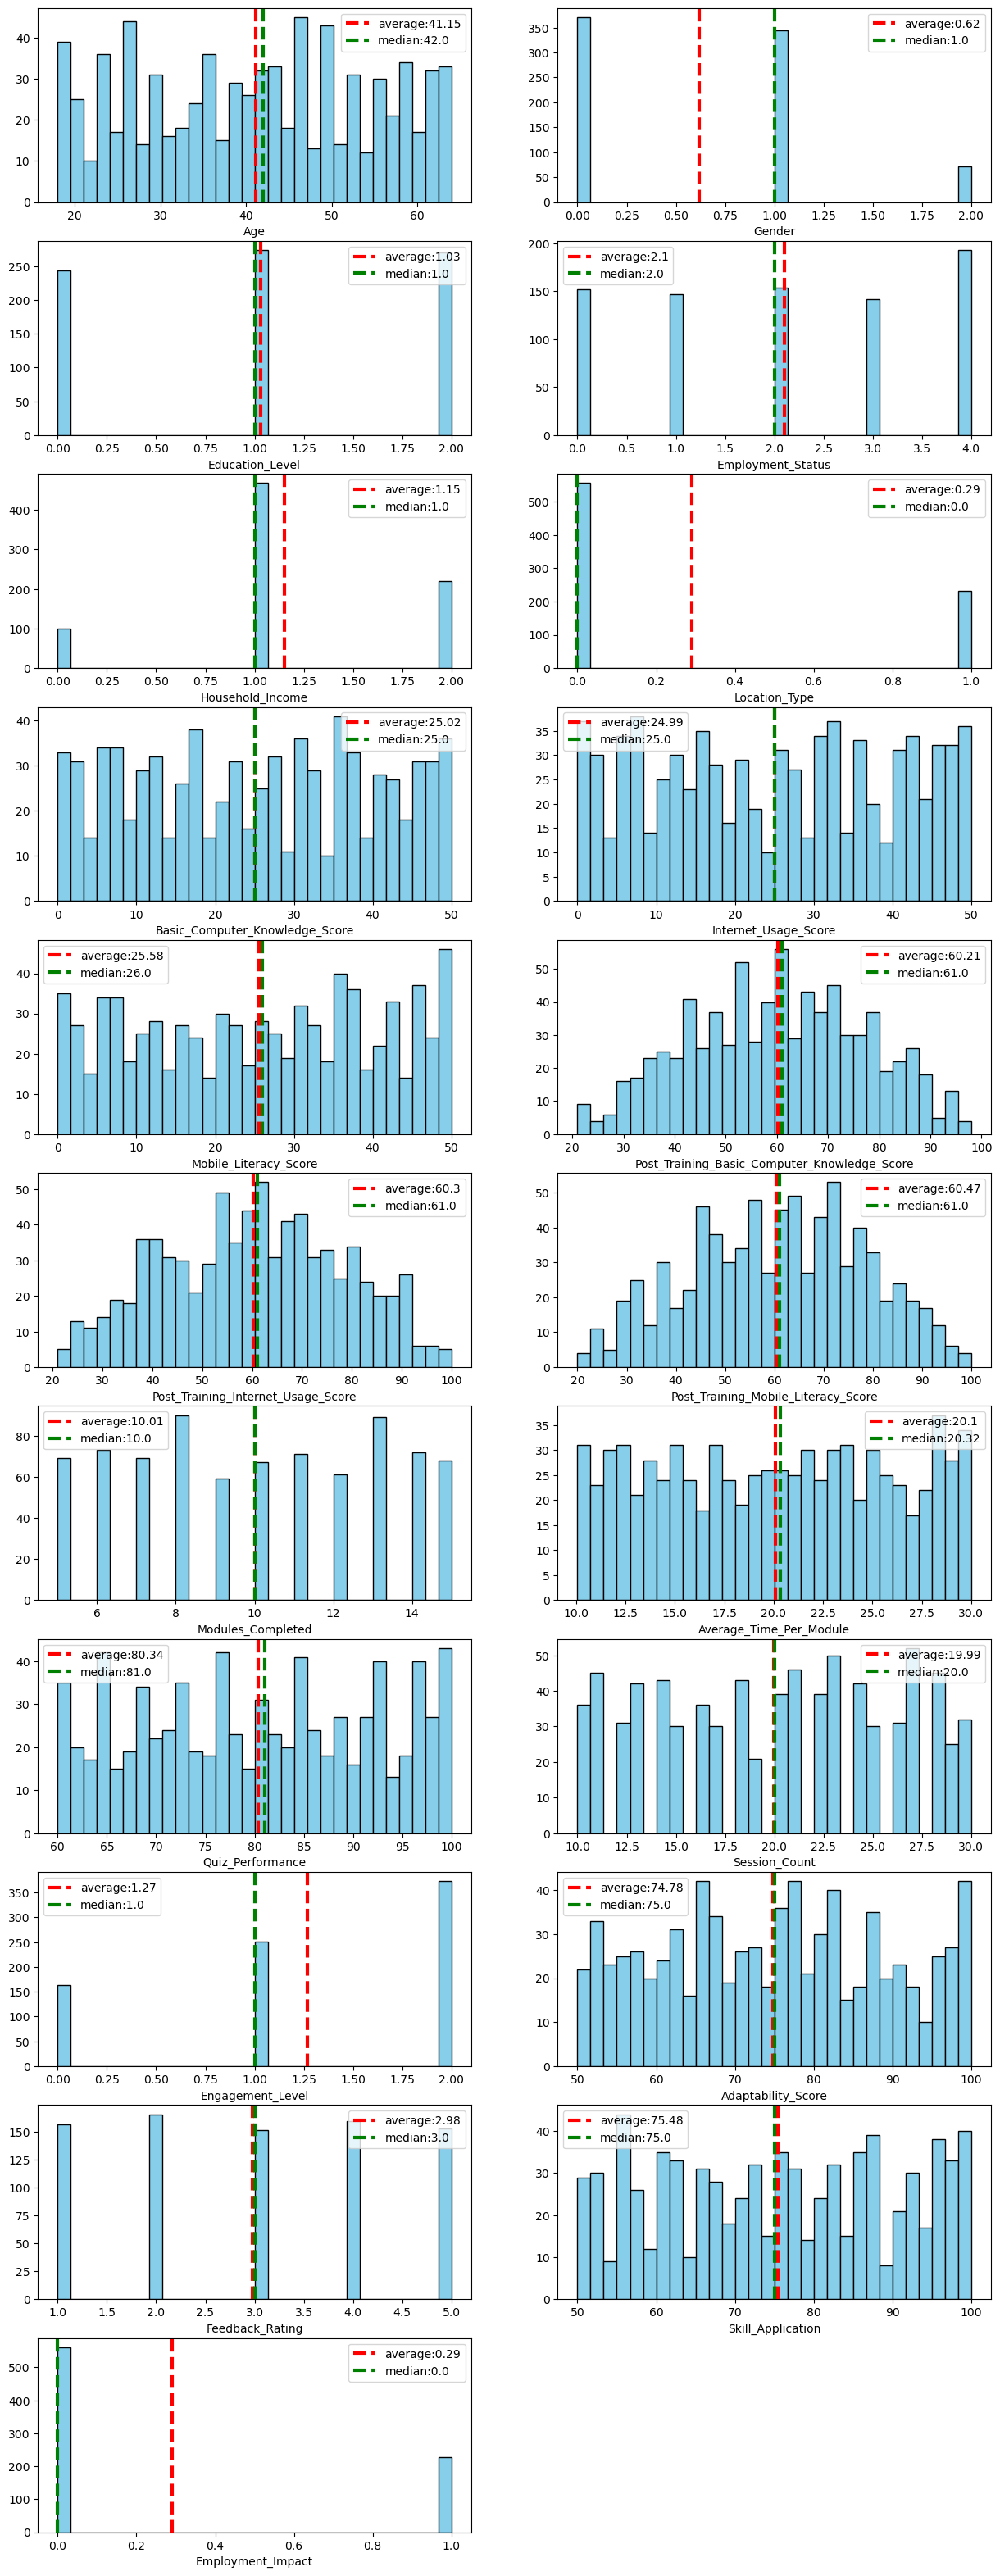

In [66]:
plt.figure(figsize=(15,40))
for ind,col in enumerate(df.columns):
    plt.subplot(11,2,ind+1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.axvline(np.round(df[col].mean(),2), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(np.round(df[col].median(),2), color='g', linestyle='dashed', linewidth=3)
    plt.legend([f'average:{np.round(df[col].mean(),2)}',f'median:{np.round(df[col].median(),2)}'])
plt.show()

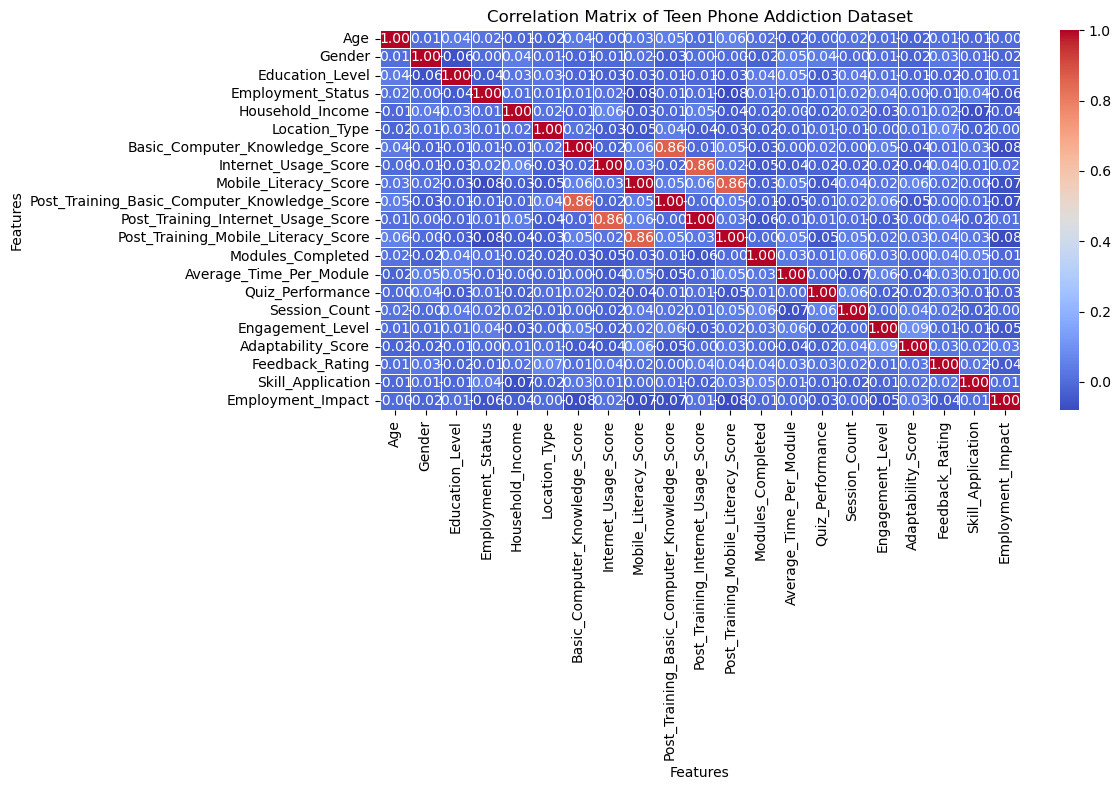

In [67]:
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

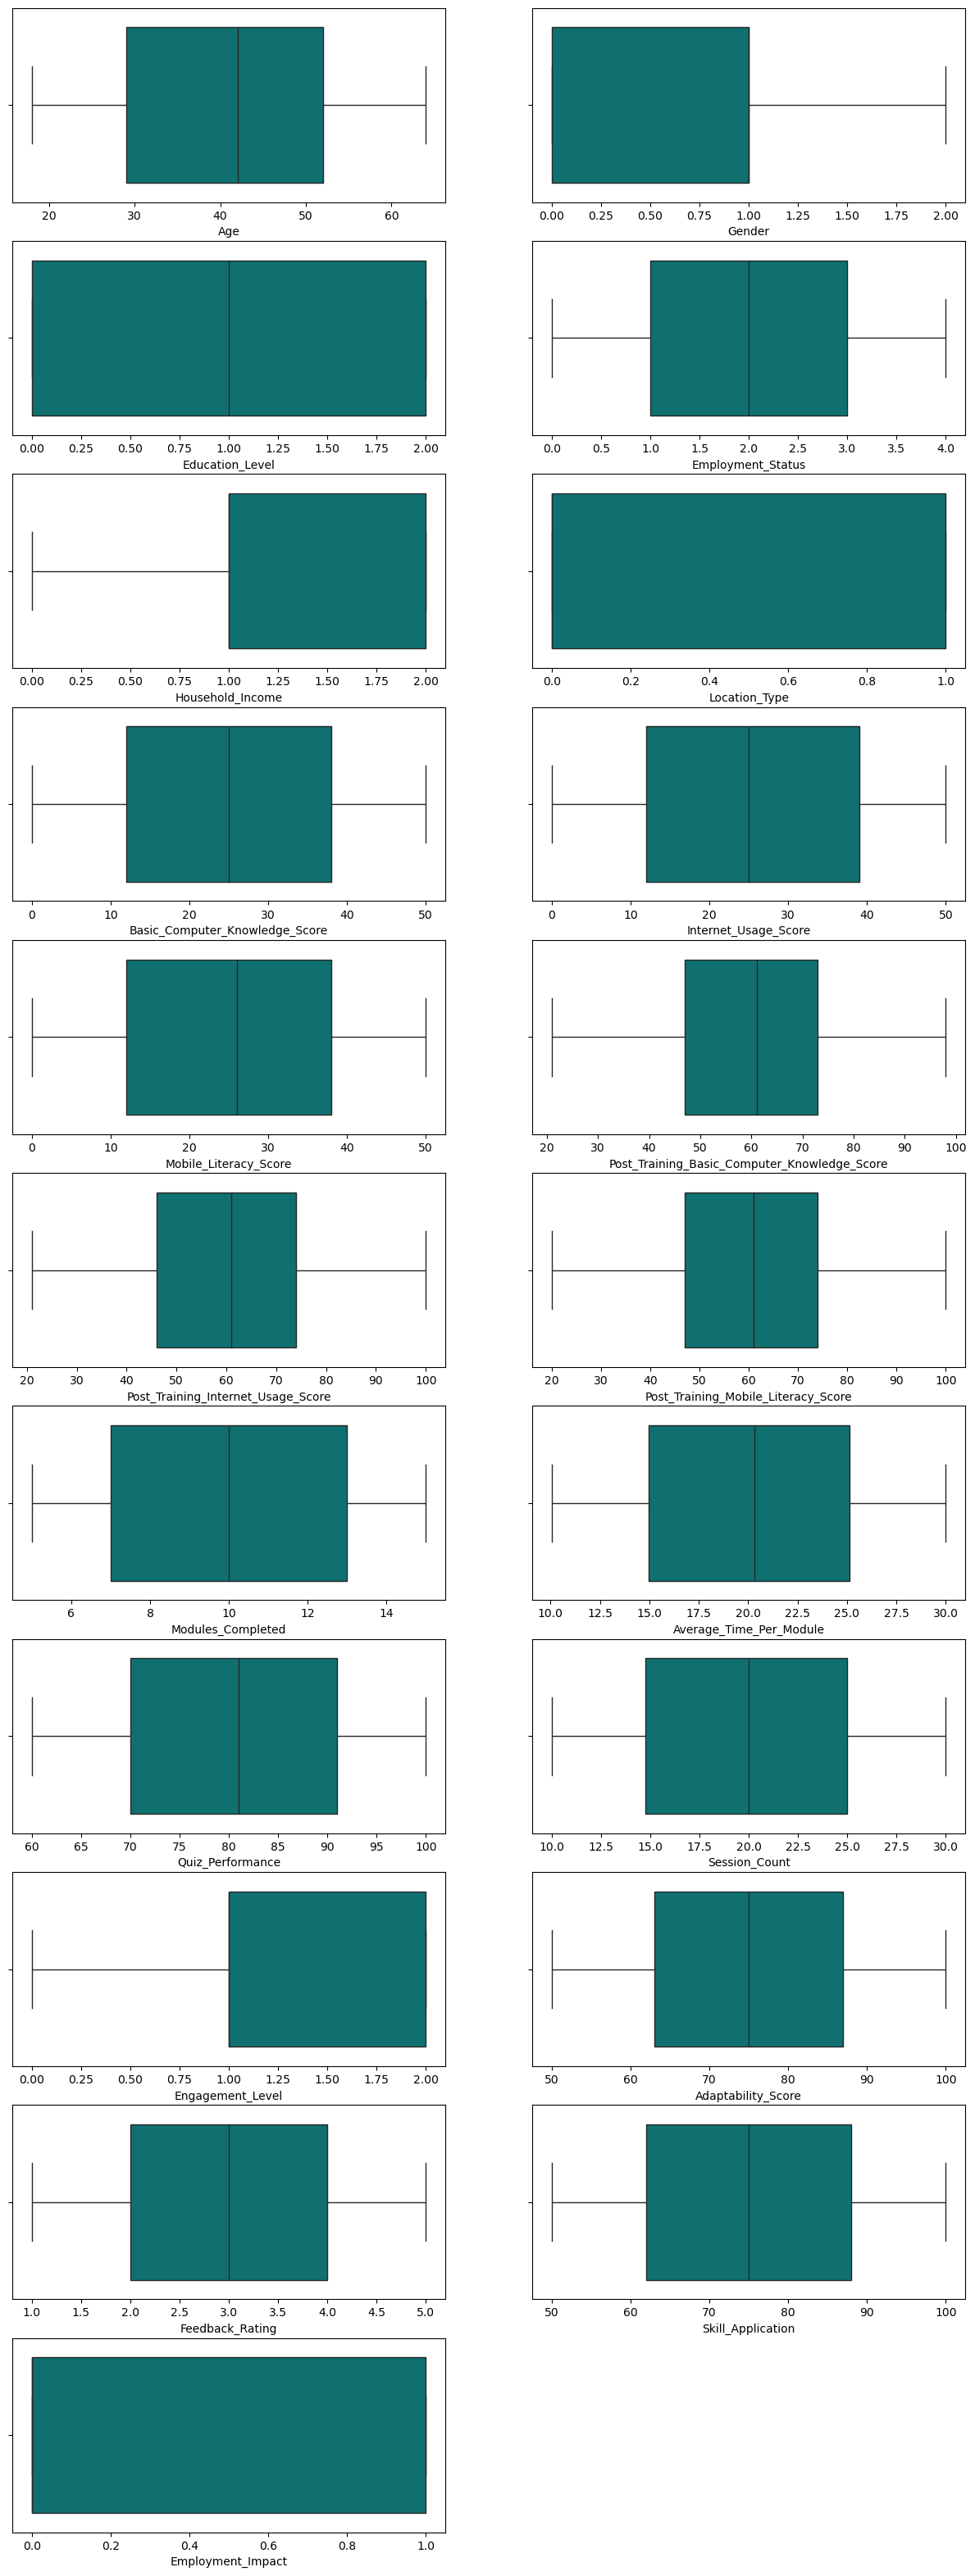

In [68]:
fig = plt.figure(figsize=(15,40))
for i, col in enumerate(df.columns):
  plt.subplot(11,2,i+1)
  seaborn.boxplot(x = df[col], color='teal')
  plt.xlabel(col)

probica


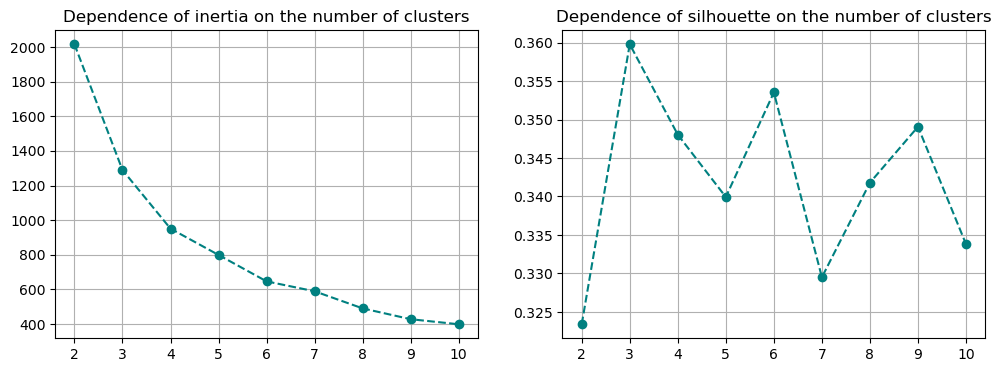

In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
cols = ['Cluster']
if all(col in df.columns for col in cols): 
    data=df.drop(cols, axis=1)
    print("tets")
else:
    print("probica")
    data = df.copy()

scaled_data = scaler.fit_transform(data)

#scaled_data=data.copy()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

inertia = []
siluette = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=18)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)
    if len(set(kmeans.labels_)) > 1:
        siluette.append(silhouette_score(pca_result, kmeans.labels_))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of inertia on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, siluette, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of silhouette on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.show()


In [74]:
kmeans = KMeans(n_clusters=3, random_state=18)
df['Cluster'] = kmeans.fit_predict(pca_result)

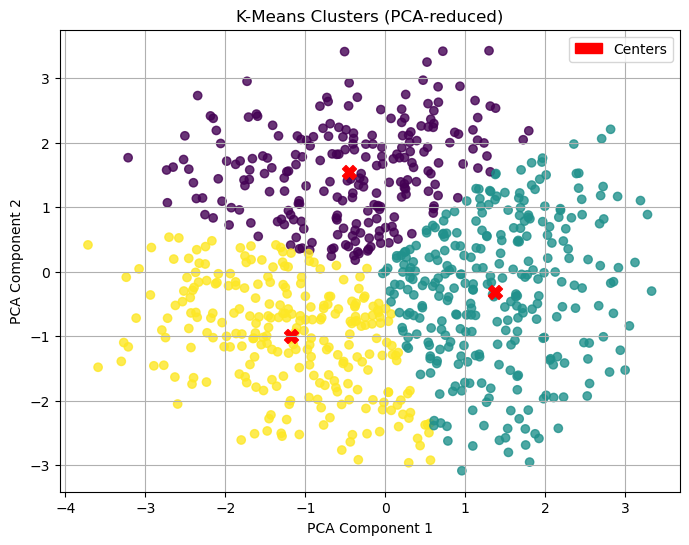

In [75]:
import matplotlib.patches as mpatches

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_result[:, 0], pca_result[:, 1],
    c=df['Cluster'], cmap='viridis', alpha=0.8
)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', label='Centers')

legend_handles = []
legend_handles.append(mpatches.Patch(color='red', label='Centers'))

plt.legend(handles=legend_handles, loc='upper right')
plt.title('K-Means Clusters (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [76]:
cluster_profile = df.groupby('Cluster')[
    [
        'Basic_Computer_Knowledge_Score',
        'Internet_Usage_Score',
        'Mobile_Literacy_Score',
        'Post_Training_Basic_Computer_Knowledge_Score',
        'Post_Training_Internet_Usage_Score',
        'Post_Training_Mobile_Literacy_Score'
    ]
].mean().round(2)

showReports(
    dfs=[cluster_profile],
    titles=["Cluster Profile"]
)

,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,Post_Training_Internet_Usage_Score,Post_Training_Mobile_Literacy_Score
Cluster,,,,,,
0,14.73,38.86,23.93,48.55,75.64,57.96
1,35.70,25.48,35.61,72.41,61.47,72.19
2,21.79,12.23,15.50,56.44,45.45,49.22


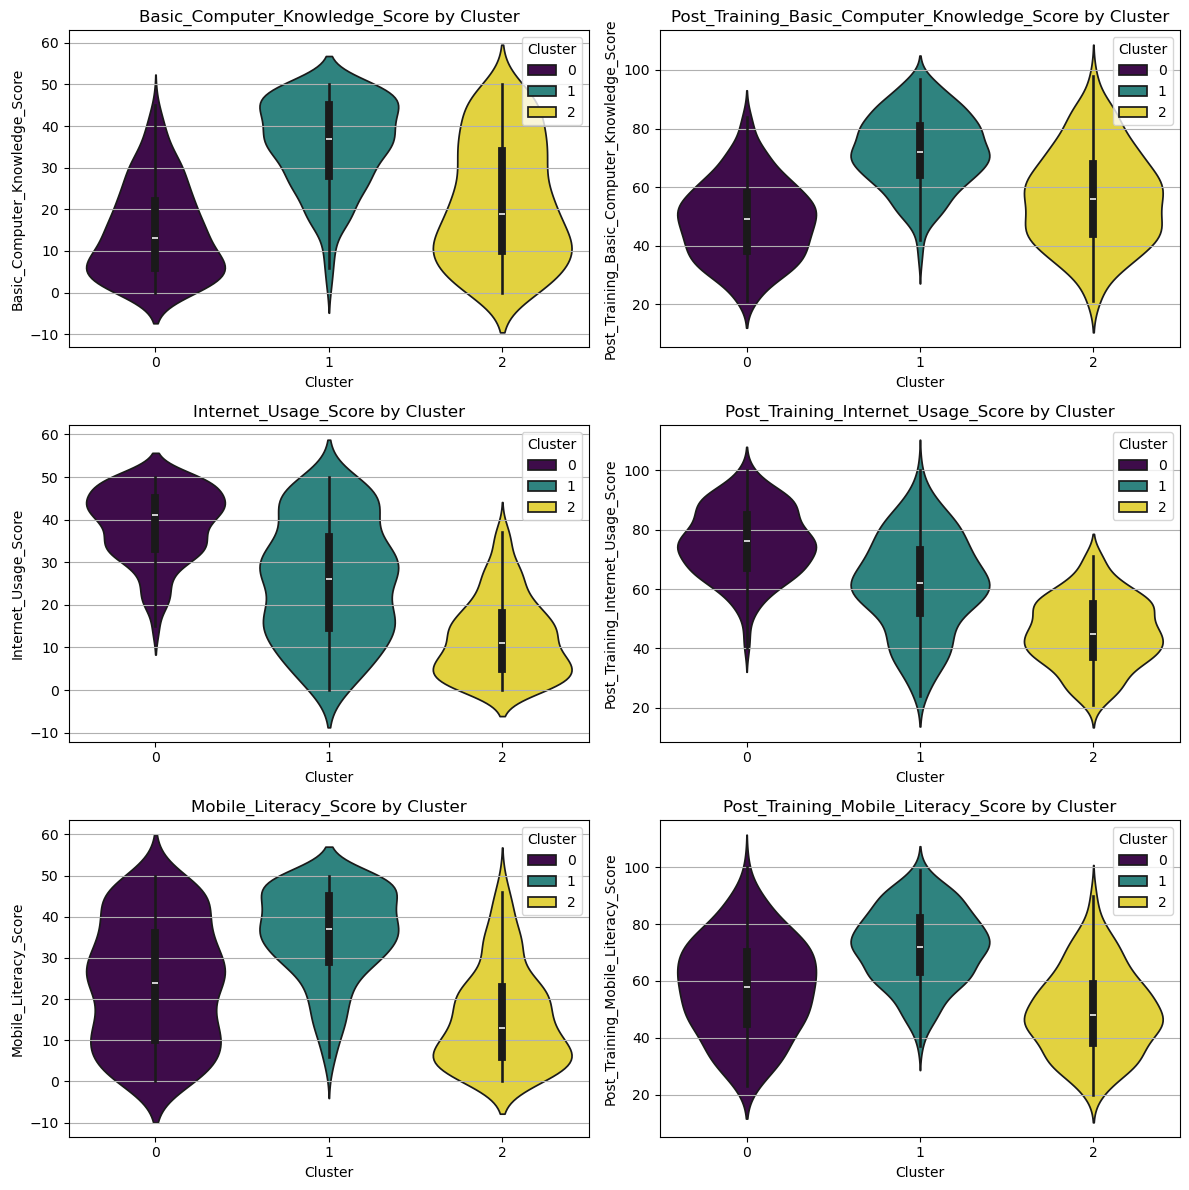

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    'Basic_Computer_Knowledge_Score',
    'Post_Training_Basic_Computer_Knowledge_Score',
    'Internet_Usage_Score',
    'Post_Training_Internet_Usage_Score',
    'Mobile_Literacy_Score',
    'Post_Training_Mobile_Literacy_Score'
]

n_features = len(features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(12, 4 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(
        x='Cluster',
        y=feature,
        hue='Cluster',
        data=df,
        palette='viridis'
    )
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y')
    plt.legend(title='Cluster', loc='upper right')

plt.tight_layout()
plt.show()